## CREACIÓ DE MODELOS 

### 1. OBTENCION DE LOS DATOS 

In [1]:
# importa librerias necesarias
import pandas as pd 
import numpy as np 


In [2]:
# cargar dataframe
df = pd.read_csv( 'promos_uio.csv')
df.head(3)

,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION,CIUDAD,CAMPAÑA,HORA_INICIO,HORA_FIN,RATING,TARGET
0,87,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:07,LARGOMETRAJE (M) (S-D),1.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,06:07:39,06:08:18,0.243378,18+
1,88,2023-01-01,AVANCE DIARIO,38.0,AUTOPROMOCION,06:08,LARGOMETRAJE (M) (S-D),1.0,126.666635,PROMOCION DEL CANAL,IMPACTOS 2022,LARGOMETRAJE,A,QUITO,NOTICIERO,06:08:17,06:08:55,0.243378,18+
2,89,2023-01-01,AVANCE DIARIO,30.0,AUTOPROMOCION,06:23,LARGOMETRAJE (M) (S-D),2.0,100.000000,PROMOCION DEL CANAL,REPRISE MUNDIAL CATAR 2022,LARGOMETRAJE,A,QUITO,DEPORTIVO,06:23:56,06:24:26,0.243378,18+


In [4]:
# limpiar y columnas 
df.drop(['Unnamed: 0', 'HORA_INICIO','HORA_FIN', 'HORA' ], axis = 1, inplace = True )


In [5]:
# renombrar columnas 
df.rename( columns =  {"SECCION/BLOQUE": 'SECCION', 'CAMPAÑA': 'CAMPANIA', 'Rat.Prom.Prog': 'RATING' }, inplace = True)
df.head(2)

,FECHA,VERSION,DURACION,TIPO,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION,CIUDAD,CAMPANIA,RATING,TARGET
0,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,LARGOMETRAJE (M) (S-D),1.0,133.333300,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,0.243378,18+
1,2023-01-01,AVANCE DIARIO,38.0,AUTOPROMOCION,LARGOMETRAJE (M) (S-D),1.0,126.666635,PROMOCION DEL CANAL,IMPACTOS 2022,LARGOMETRAJE,A,QUITO,NOTICIERO,0.243378,18+


### 2. SEPARAR EN TRAIN Y TEST

In [6]:
# importar librerias necesarias 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix


In [33]:
# separar datos en etiquetas y categorias 
X = df.drop("SECCION", axis = 1)
y = df['SECCION']



In [34]:
#PREPOSESAR CARACTERISTICAS
encoders = {}
for column in X.select_dtypes(include = ['object'] ).columns:
    encoder = LabelEncoder()
    X[column] = encoder.fit_transform( X[column] )
    encoders[column] = encoder
    


In [35]:
#separar en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20 , random_state = 42 )

In [36]:
X_test

,FECHA,VERSION,DURACION,TIPO,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,CIUDAD,CAMPANIA,RATING,TARGET
329418,98,85,30.0,2,9,1.0,400.0000,2,185,10,0,1,1.574813,2
432460,193,74,18.0,0,54,1.0,666.6667,2,189,3,0,4,1.639715,2
144635,326,7,30.0,0,337,2.0,400.0000,2,271,13,0,18,0.772016,4
154816,360,80,31.0,2,417,3.0,200.0000,2,45,3,0,16,0.528637,1
197368,385,113,29.0,2,7,1.0,400.0000,2,280,10,0,1,1.466905,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201502,2,60,6.0,1,463,1.0,283.3333,2,67,14,0,3,0.888325,0
191498,386,60,7.0,1,30,1.0,400.0000,2,255,13,0,18,1.297755,0
258980,48,124,6.0,2,454,1.0,600.0000,2,219,14,0,18,0.700244,2
188136,383,52,20.0,0,443,1.0,800.0000,2,0,14,0,1,1.841134,0


### 3. ENTRENAR MODELO

In [37]:
modelo = GaussianNB( var_smoothing= 1e-2)
modelo.fit(X_train, y_train)


GaussianNB(var_smoothing=0.01)

### 4. EVALUAR MODELO

In [38]:
y_pred = modelo.predict(X_test)

In [39]:
accuracy_score(y_test, y_pred)

0.5650290135396518

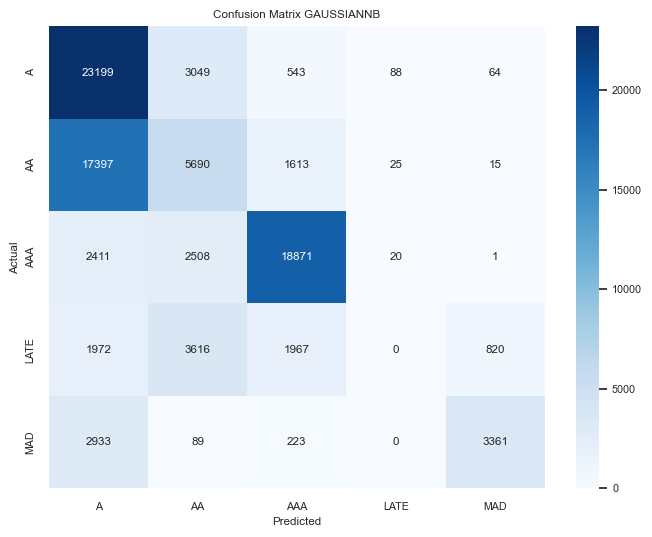

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

matriz = confusion_matrix(y_test, y_pred)
class_labels = np.unique(np.concatenate((y_test, y_pred)))
plt.figure(figsize=(8, 6))

sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix GAUSSIANNB")
plt.show()


In [13]:
t=[193,74,18.0,0,54,1.0,666.6667,2,189,3,3,0,4,2]

In [27]:
pred =  modelo.predict([t])

C:\Users\gabio\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [28]:
pred

array(['1.63971525424981'], dtype='<U18')

In [115]:
#Guardar modelo 
import pickle
modelName = 'gm.pkl'
encoderName = 'em.pkl'

pickle.dump(modelo, open(modelName, 'wb'))
pickle.dump(encoders, open(encoderName, 'wb'))



In [116]:
ndf = df.iloc[0:1]
ndf

,Unnamed: 0,FECHA,VERSION,DURACION,TIPO,HORA,PROGRAMA,BREAK,TARIFA,CATEGORIA,ITEM,GENERO,SECCION,CIUDAD,CAMPANIA,HOR_INI-HH:MM:SS,HOR_FIN-HH:MM:SS,RATING,TARGET
0,87,2023-01-01,AVANCE DIARIO IV,40.0,AUTOPROMOCION,06:07,LARGOMETRAJE (M) (S-D),1.0,133.3333,PROMOCION DEL CANAL,MASTER CHEF ECUADOR 4T,LARGOMETRAJE,A,QUITO,CONCURSO/ENTRETENIMIENTO,06:07:39,06:08:18,0.243378,18+


In [112]:
lgm = pickle.load(open(modelName, 'rb'))
le =  pickle.load(open(encoderName, 'rb'))


In [113]:
for column in ndf.select_dtypes( include= ['object'] ).columns:
    if column in le:
        lable_encoder = le[column]
        ndf[column] = lable_encoder.transform (ndf[column] )
ndf.drop("SECCION", axis = 1, inplace = True )
    

C:\Users\gabio\AppData\Local\Temp\ipykernel_6640\1805145852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[column] = lable_encoder.transform (ndf[column] )
C:\Users\gabio\AppData\Local\Temp\ipykernel_6640\1805145852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndf[column] = lable_encoder.transform (ndf[column] )
C:\Users\gabio\AppData\Local\Temp\ipykernel_6640\1805145852.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [114]:
prediccion = lgm.predict( ndf )
prediccion

array(['A'], dtype='<U4')